# Data Science Lab 1 - Iris dataset

The goal is to determine wether or not the various classes of Iris are separated.

In [29]:
import pandas as pd

iris = pd.read_csv("../data/iris_cleaned.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,virginica
142,6.3,2.5,5.0,1.9,virginica
143,6.5,3.0,5.2,2.0,virginica
144,6.2,3.4,5.4,2.3,virginica


### Scikit-Learn PCA

#### Normalise features
Bring variables to the same scale.

In [30]:
from sklearn.preprocessing import StandardScaler

y = iris['species']

x = iris.drop('species', axis=1)
x_scaled = x.to_numpy()#StandardScaler().fit_transform(x)

iris_scaled = pd.DataFrame(x_scaled)
iris_scaled["species"] = y

In [32]:
univar = iris_scaled[y == "virginica"].drop('species', axis=1)
univar.shape

(50, 4)

#### Apply PCA

In [33]:
from sklearn.decomposition import PCA

n_comps = 4

pca = PCA(n_components=n_comps)
pca.fit_transform(univar)
iris_trans = pca.transform(x_scaled)

Text(0.5, 1.0, 'Individual explained variance')

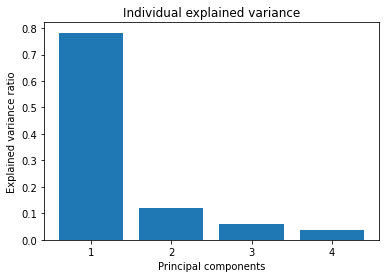

In [26]:
import matplotlib.pyplot as plt

plt.bar([str(i+1) for i in range(n_comps)], pca.explained_variance_ratio_, align='center')
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.title("Individual explained variance")

We see that the first principal component seems to contain a very large part of the variance information, so we could almost neglect all the others without losing too much information.

Explained variance for 2 components:

In [27]:
sum(pca.explained_variance_ratio_[:2])

0.9025613862676921

#### Scatter plots

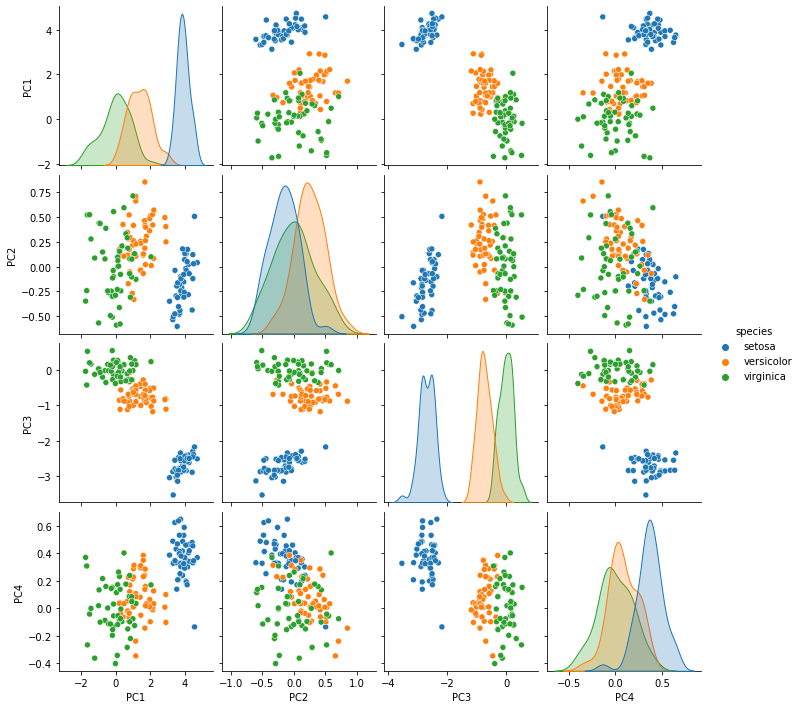

In [34]:
from seaborn import pairplot

iris_trans = pd.DataFrame(iris_trans, columns=[f"PC{i+1}" for i in range(n_comps)])
iris_trans['species'] = y

pairplot(iris_trans, hue='species')